### Starting from the same galaxy sample, how well can we recreate the galaxy groups and their VelDisp, Group radius and DynMass measurements

In [1]:
from astropy.io import fits
from astropy.table import Table
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from GalGroup import *

In [2]:
hdul = fits.open('G3CGalv10.fits')
data = hdul[1].data
t=Table(data)
df = t.to_pandas()

In [3]:
df = add_column(df, column_file = 'Eqkcorr_auto_z00v05.fits', column_name = 'KCORR_R', common_column = 'CATAID')

In [4]:
df

,CATAID,RA,Dec,Z,Rpetro,DM_100_25_75,SURVEY_CODE,SigErr,GroupID,RankIterCen,...,AngSepIterCen,RankBCG,SepBCG,CoSepBCG,AngSepBCG,RankCen,SepCen,CoSepCen,AngSepCen,KCORR_R
0,6802,174.005984,0.720935,0.051814,18.622816,36.044518,5,24.158697,0,-999,...,-999.000000,-999,-999.000000,-999.000000,-999.000000,-999,-999.000000,-999.000000,-999.000000,0.054619
1,6803,174.021648,0.754885,0.161697,19.219088,38.683414,5,40.067787,0,-999,...,-999.000000,-999,-999.000000,-999.000000,-999.000000,-999,-999.000000,-999.000000,-999.000000,0.200379
2,6804,174.092055,0.674096,0.220298,19.341200,39.434891,5,24.125309,0,-999,...,-999.000000,-999,-999.000000,-999.000000,-999.000000,-999,-999.000000,-999.000000,-999.000000,0.111177
3,6805,174.022355,0.702532,0.334006,19.301096,40.477726,5,58.761257,203003,2,...,0.042028,2,12.394894,0.056042,0.042028,2,8.251231,0.037307,0.027978,0.271288
4,6806,174.022807,0.705945,0.332854,18.544878,40.468914,5,24.662685,203003,1,...,0.000000,1,0.000000,0.000000,0.000000,1,4.143663,0.018735,0.014050,0.252873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204105,2566785,36.722090,-5.175171,0.535828,18.738974,41.708488,5,132.536270,0,-999,...,-999.000000,-999,-999.000000,-999.000000,-999.000000,-999,-999.000000,-999.000000,-999.000000,NaN
204106,2566796,36.755126,-5.191941,0.437367,19.578087,41.173897,5,43.717125,0,-999,...,-999.000000,-999,-999.000000,-999.000000,-999.000000,-999,-999.000000,-999.000000,-999.000000,NaN
204107,2567785,36.528165,-5.783579,0.031455,15.858828,34.926868,5,23.447887,402540,1,...,0.000000,1,0.000000,0.000000,0.000000,1,1.116968,0.000507,0.000492,NaN
204108,2567786,36.525146,-5.784139,0.031375,18.220270,34.921204,5,25.462156,402540,2,...,0.004840,2,10.999397,0.004992,0.004840,2,9.882425,0.004486,0.004349,NaN


Constants used : H0 = 100 , Om0 = 0.25 , Ode0 = 0.75 , h = 1.0 km / (Mpc s) , alpha = -1.26 , M_star = -20.71 , phi_star = 0.009549925860214359 , b0 = 0.06 , R0 = 18 , Eb = -0.0 , Er = -0.02 , nu = 0.63 , delta = 9 , r_delta = 1500000.0 , l_delta = 12000000.0
Setting up the Group finder : 
Calculating rho_bar ...


0it [00:00, ?it/s]

Calculating rho_emp ...


  0%|          | 0/204110 [00:00<?, ?it/s]

  0%|          | 0/204110 [00:00<?, ?it/s]

Calculating R and b ...


  0%|          | 0/204110 [00:00<?, ?it/s]

Calculating D_lim ...


  0%|          | 0/204110 [00:00<?, ?it/s]

20341 galaxies removed due to having D_lim > 10**8
Running the Group finder : 
Finding groups ...


  0%|          | 0/183769 [00:00<?, ?it/s]

Writing groups to a dataframe ...


  0%|          | 0/26025 [00:00<?, ?it/s]

  0%|          | 0/26025 [00:00<?, ?it/s]

Calculating group velocity dispersion ...


  0%|          | 0/26025 [00:00<?, ?it/s]

97 groups removed due to having Vel_Disp > 2500
Calculating group projected radius ...


  0%|          | 0/25928 [00:00<?, ?it/s]

Calculating group dynamical mass ...


  0%|          | 0/25928 [00:00<?, ?it/s]

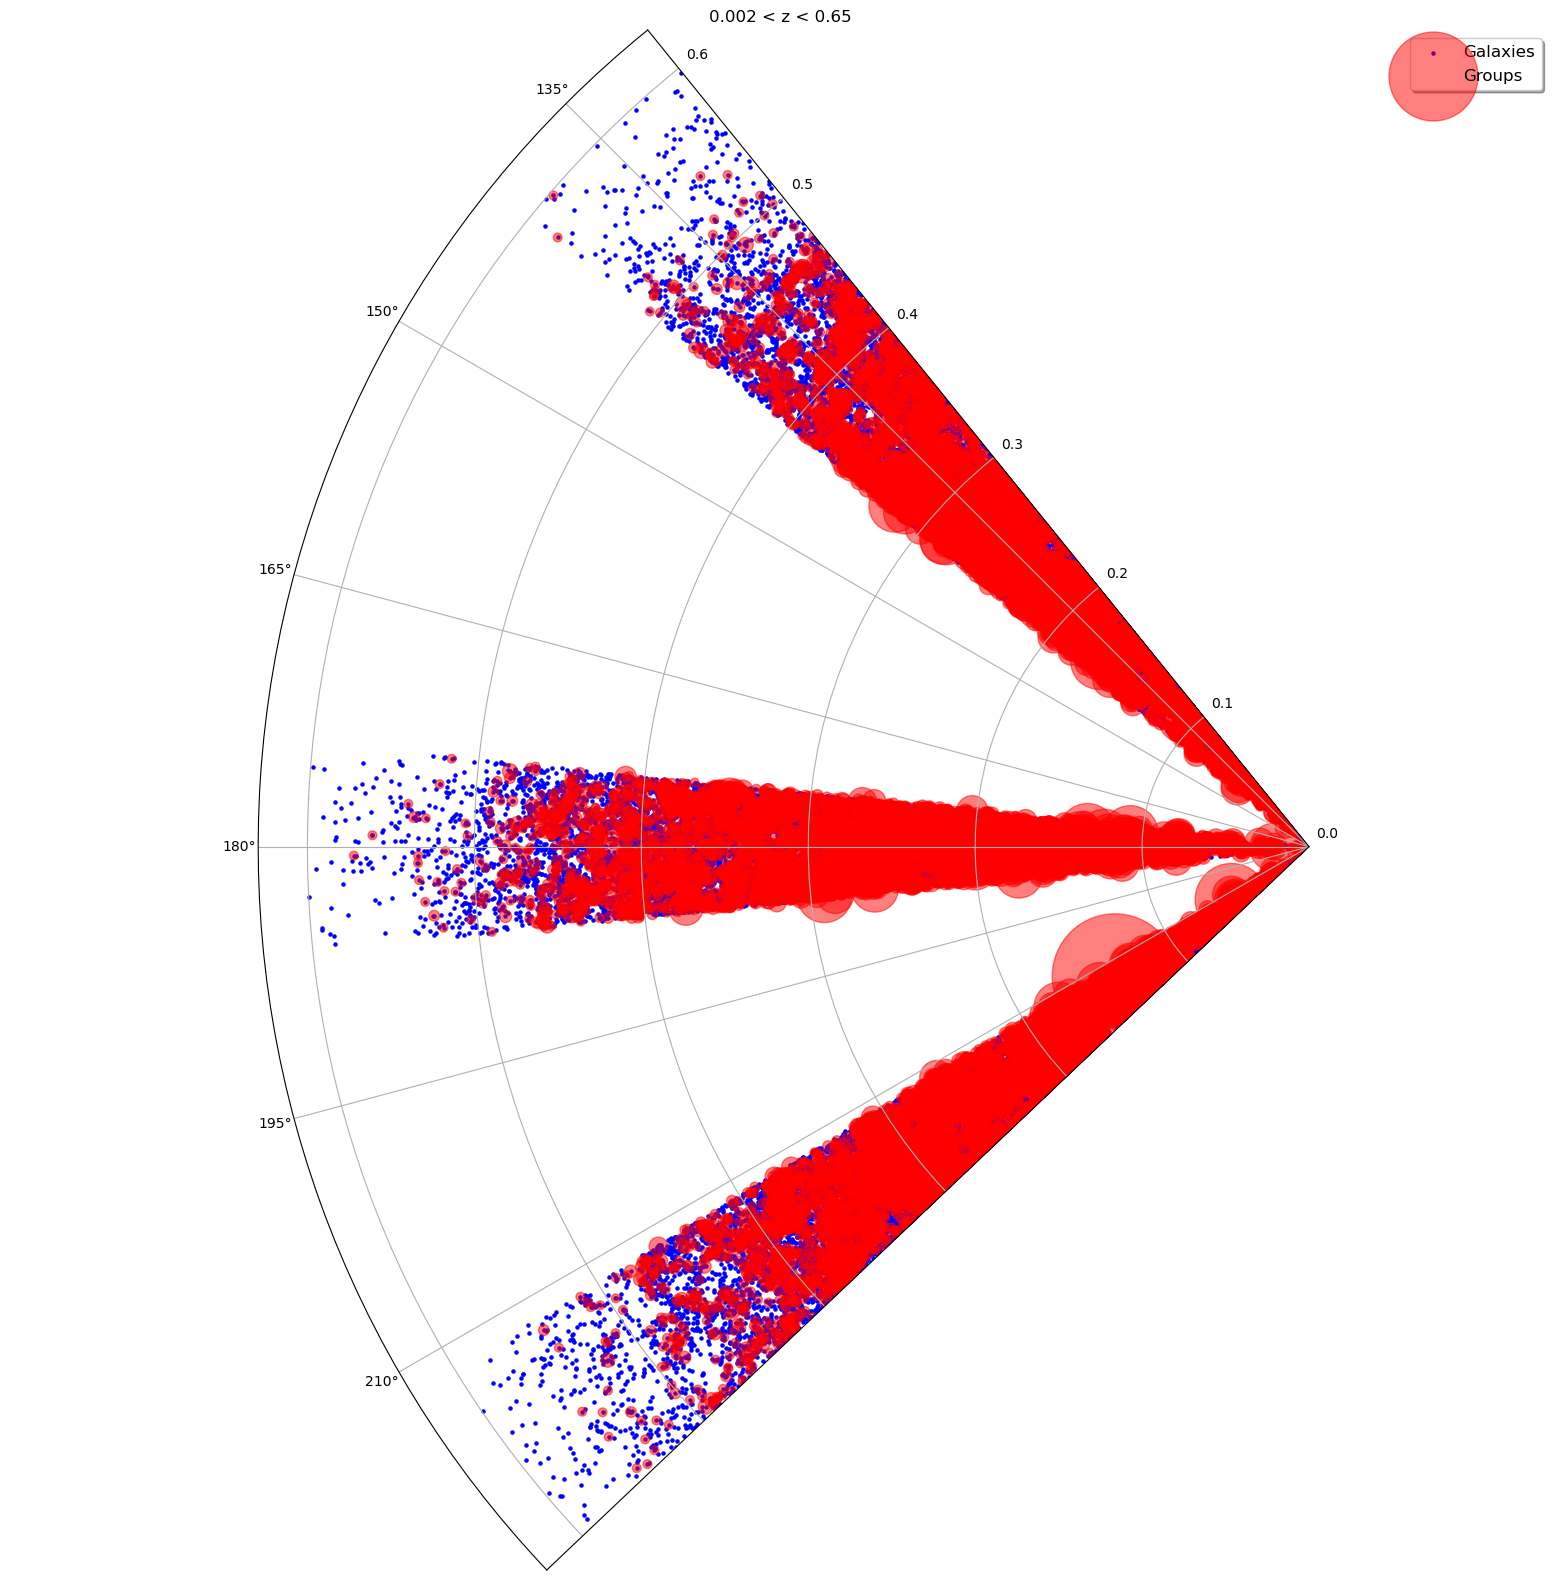

In [5]:
dfRec, df = main(dataframe = df, zmin=0.002, zmax=0.65, mag_col = 'Rpetro', Z_col = 'Z', Kcorr_col = 'KCORR_R', 
                 vel_err_col = 'SigErr', RA_col = 'RA', Dec_col = 'Dec', ID_col = 'CATAID', H0=100, Om0=0.25, Ode0=0.75)

In [6]:
df

,CATAID,RA,Dec,Z,Rpetro,DM_100_25_75,SURVEY_CODE,SigErr,GroupID,RankIterCen,...,IndexLoc,Num_Den,rho_emp,b,R,D0,Ang_link,Los_link,RecID,v
0,6802,174.005984,0.720935,0.051814,18.622816,36.044518,5,24.158697,0,-999,...,0,2,0.023579,0.06,18.009035,2.705890e+06,0.001056,2.923828e+06,0,15533387.0
1,6803,174.021648,0.754885,0.161697,19.219088,38.683414,5,40.067787,0,-999,...,1,1,0.011789,0.06,17.446718,4.399146e+06,0.000562,4.605040e+06,0,48475468.0
2,6804,174.092055,0.674096,0.220298,19.341200,39.434891,5,24.125309,0,-999,...,2,1,0.011789,0.06,17.090388,5.486357e+06,0.000521,5.625839e+06,0,66043616.0
3,6805,174.022355,0.702532,0.334006,19.301096,40.477726,5,58.761257,203003,2,...,3,2,0.023579,0.06,15.870865,1.021820e+07,0.000656,9.730297e+06,3,100132384.0
4,6806,174.022807,0.705945,0.332854,18.544878,40.468914,5,24.662685,203003,1,...,4,2,0.023579,0.06,15.233912,1.571339e+07,0.001013,1.436258e+07,3,99787160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183764,4220443,181.699980,-1.981059,0.254122,19.383205,39.788528,5,69.031700,0,-999,...,183764,3,0.035368,0.06,16.399481,6.718203e+06,0.000557,6.610503e+06,0,76183880.0
183765,4265516,129.750133,0.061317,0.205135,18.858145,39.259930,5,38.587601,103220,1,...,183765,5,0.058946,0.06,16.539795,5.515109e+06,0.000561,5.473126e+06,62468,61497776.0
183766,4310456,181.327902,1.447848,0.243260,19.625502,39.679916,5,24.820072,0,-999,...,183766,1,0.011789,0.06,17.061606,5.585501e+06,0.000483,5.717857e+06,0,72927656.0
183767,4331410,130.281567,-0.116788,0.295070,19.516560,40.163151,5,54.553314,0,-999,...,183767,3,0.035368,0.06,16.201390,7.608446e+06,0.000548,7.396044e+06,0,88459864.0


In [7]:
dfRec

,RecID,N,CentreID,Z,RA,Dec,CentreCATAID,VelDisp_raw,VelDisp,Rad,DynMass
0,3,2,4,0.332854,174.022807,0.705945,6806,324.622255,321.479457,0.028066,6.743913e+12
1,6,2,6,0.230851,174.100731,0.658922,6808,143.662914,133.639434,0.011046,4.586796e+11
2,8,2,8,0.327908,174.109090,0.803909,6810,359.756391,357.738905,0.107678,3.203971e+13
3,20,2,20,0.313851,174.150221,0.675395,6827,223.325085,218.821627,0.023523,2.618838e+12
4,30,2,30,0.075612,174.302787,0.789993,6837,87.470032,84.158108,0.005444,8.965310e+10
...,...,...,...,...,...,...,...,...,...,...,...
25923,183883,2,183883,0.292005,139.916992,-1.275225,3913677,390.109105,389.106649,0.061914,2.179495e+13
25924,183898,3,183905,0.027079,139.977026,-1.272340,3913787,50.899338,44.335440,0.002271,1.037977e+10
25925,183909,2,183912,0.361721,139.970278,-1.257093,3913823,91.155430,79.530084,0.063910,9.398575e+11
25926,183959,2,183960,0.143840,139.580504,-0.914533,3914237,230.225711,225.723303,0.036727,4.350752e+12


In [8]:
hdul = fits.open('G3CFoFGroupv10.fits')
data = hdul[1].data
t=Table(data)
dfR = t.to_pandas()

In [9]:
dfR = dfR[dfR['GroupEdge']==1]
dfR

,GroupID,Nfof,IterCenCATAID,IterCenRA,IterCenDec,IterCenZ,Zfof,Rad50,Rad1Sig,Rad100,...,LumBfunc,d3vol,d3area,d2radec,d2raz,d2decz,distortcirc,distortellip,distortsph,URL_IMG
0,100001,62,622475,133.652530,0.642573,0.108074,0.108044,0.350337,0.511327,0.723547,...,5.707738e+11,13.453133,67.206726,0.982322,19.432892,22.070499,1.044060,1.147736,2.456856,http://www.gama-survey.org/dr4/data/files/Grou...
1,100002,59,599753,132.599724,0.260119,0.197270,0.197310,0.475004,0.583933,1.592990,...,7.532606e+11,13.879583,63.516598,1.464789,15.836410,25.748030,1.316447,1.324571,2.274148,http://www.gama-survey.org/dr4/data/files/Grou...
2,100003,76,575146,138.519864,-0.023528,0.167690,0.167680,1.071943,1.818537,3.015239,...,9.775184e+11,18.082594,70.801666,2.141497,16.040085,29.723379,1.258020,1.329273,2.125130,http://www.gama-survey.org/dr4/data/files/Grou...
3,100004,37,549404,131.435402,-0.488043,0.156034,0.156474,0.267129,0.302825,0.627853,...,4.435979e+11,3.328334,24.334095,0.521852,7.228287,8.428942,1.095464,1.274427,2.257251,http://www.gama-survey.org/dr4/data/files/Grou...
4,100005,34,387173,135.502599,2.393273,0.202819,0.202638,0.457391,0.611274,1.019182,...,4.437586e+11,8.139059,42.717434,0.900930,15.201762,12.295998,1.093525,1.199399,2.183090,http://www.gama-survey.org/dr4/data/files/Grou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26189,402536,2,2553485,38.413094,-3.800079,0.324514,0.323355,0.119764,0.162879,0.239528,...,5.192408e+10,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,http://www.gama-survey.org/dr4/data/files/Grou...
26190,402537,2,2553514,38.444132,-3.775456,0.322746,0.322606,0.040510,0.055094,0.081021,...,3.281776e+10,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,http://www.gama-survey.org/dr4/data/files/Grou...
26191,402538,2,2558880,38.404854,-3.741646,0.274162,0.274447,0.082920,0.112771,0.165839,...,1.765586e+10,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,http://www.gama-survey.org/dr4/data/files/Grou...
26192,402539,2,2562629,37.469491,-5.626938,0.175668,0.175309,0.060657,0.082494,0.121315,...,1.612532e+10,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,http://www.gama-survey.org/dr4/data/files/Grou...


In [10]:
dfRec.rename(columns={'CentreCATAID': 'IterCenCATAID', 'N': 'Nfof'}, inplace=True)
dfRec = add_column(dfRec, column_file = 'G3CFoFGroupv10.fits', column_name = 'VelDisp', common_column = 'IterCenCATAID')
dfRec = add_column(dfRec, column_file = 'G3CFoFGroupv10.fits', column_name = 'VelDispRaw', common_column = 'IterCenCATAID')
dfRec = add_column(dfRec, column_file = 'G3CFoFGroupv10.fits', column_name = 'Rad50', common_column = 'IterCenCATAID')
dfRec = add_column(dfRec, column_file = 'G3CFoFGroupv10.fits', column_name = 'MassA', common_column = 'IterCenCATAID')
dfRec.rename(columns={'VelDisp_x': 'VelDisp_Rec', 'VelDisp_y': 'VelDisp_R'}, inplace=True)

#### Number of groups with same central galaxy and same number of galaxies

In [11]:
matching_df = pd.merge(dfRec, dfR, on=['IterCenCATAID', 'Nfof'], how='inner')
matching_count = matching_df.shape[0]
matching_count

15469

#### Measurement comparison for groups with same central galaxy

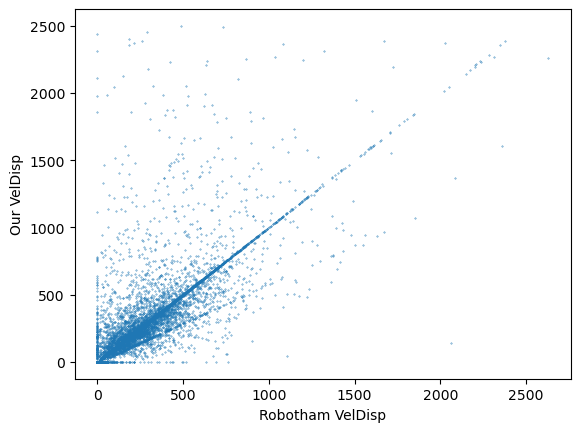

In [12]:
plt.scatter(dfRec['VelDisp_R'], dfRec['VelDisp_Rec'], s=0.1)
plt.xlabel('Robotham VelDisp')
plt.ylabel('Our VelDisp')
plt.show()

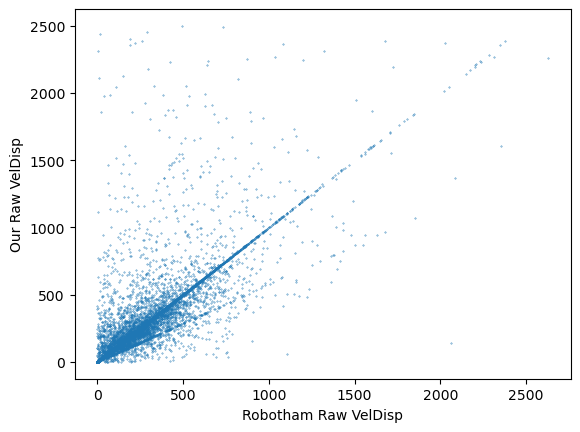

In [13]:
plt.scatter(dfRec['VelDispRaw'], dfRec['VelDisp_raw'], s=0.1)
plt.xlabel('Robotham Raw VelDisp')
plt.ylabel('Our Raw VelDisp')
plt.show()

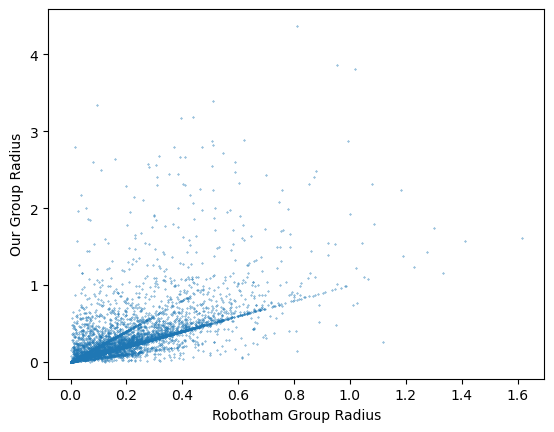

In [14]:
plt.scatter(dfRec['Rad50'], dfRec['Rad'], s=0.1)
plt.xlabel('Robotham Group Radius')
plt.ylabel('Our Group Radius')
plt.show()

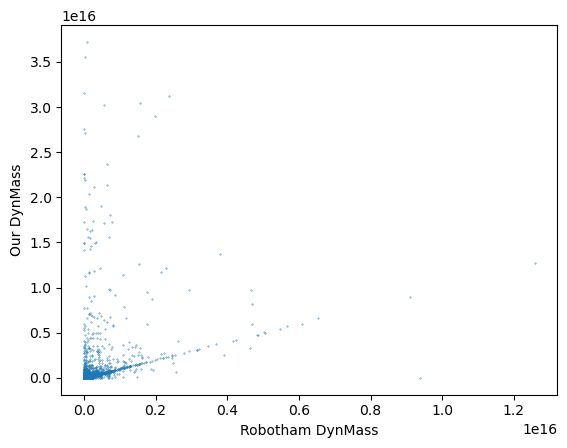

In [15]:
plt.scatter(dfRec['MassA'], dfRec['DynMass'], s=0.1)
plt.xlabel('Robotham DynMass')
plt.ylabel('Our DynMass')
plt.show()

#### Measurement comparison for groups with same central galaxy and galaxy population >= 5

In [16]:
dfRec = dfRec[dfRec['Nfof']>=5]

In [17]:
dfRec

,RecID,Nfof,CentreID,Z,RA,Dec,IterCenCATAID,VelDisp_raw,VelDisp_Rec,Rad,DynMass,VelDisp_R,VelDispRaw,Rad50,MassA
16,105,15,122,0.358903,174.924700,0.762383,6934,595.430156,593.977277,0.637308,5.227805e+14,615.366089,616.636108,0.631445,5.559233e+14
22,152,5,156,0.275541,175.122086,0.770396,6973,84.418173,78.143579,0.150000,2.129654e+12,NaN,NaN,NaN,NaN
24,157,12,30613,0.076090,175.131918,0.853182,97907,288.846493,287.866145,0.145033,2.794338e+13,287.755737,288.736481,0.144900,2.789507e+13
35,207,5,30649,0.262464,175.286359,0.848395,97952,162.096330,158.581880,0.194101,1.134920e+13,158.580780,162.095245,0.193739,1.132739e+13
36,208,26,225,0.311314,175.347288,0.633636,7043,674.389396,673.220813,0.504057,5.311596e+14,620.779236,621.994995,0.432254,3.872810e+14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25894,183636,8,183646,0.104120,138.867091,-1.302325,3911985,216.768475,213.957080,0.070736,7.528731e+12,204.707474,207.662933,0.049569,4.829326e+12
25900,183700,10,183726,0.298622,139.165695,-1.230357,3912593,387.813425,383.572400,0.334368,1.143801e+14,NaN,NaN,NaN,NaN
25905,183740,6,183740,0.165540,139.244483,-1.231917,3912731,220.010712,216.722392,0.132322,1.445003e+13,231.832001,234.747437,0.010119,1.264403e+12
25908,183774,12,183774,0.299497,139.498756,-1.206350,3912987,1395.136289,1394.745899,0.817959,3.699578e+15,181.899460,185.654480,0.497198,3.824766e+13


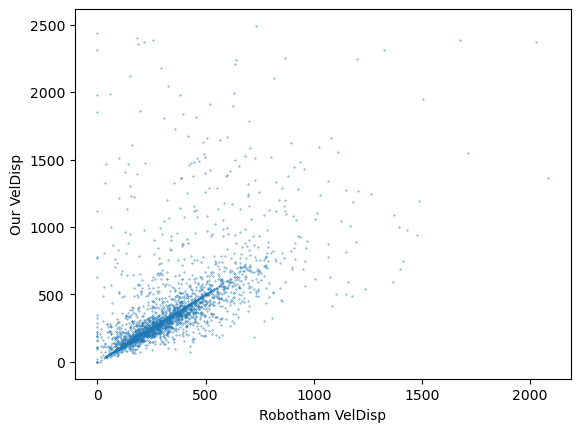

In [18]:
plt.scatter(dfRec['VelDisp_R'], dfRec['VelDisp_Rec'], s=0.1)
plt.xlabel('Robotham VelDisp')
plt.ylabel('Our VelDisp')
plt.show()

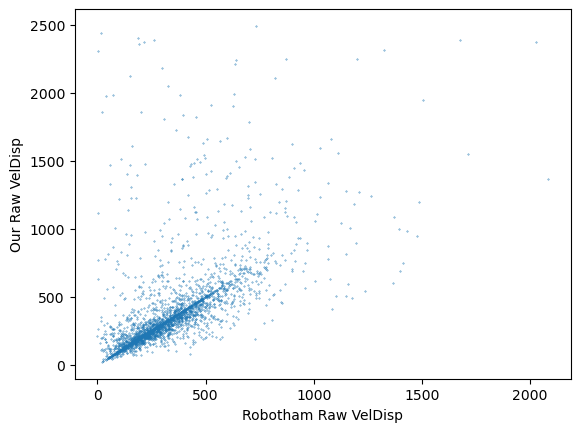

In [19]:
plt.scatter(dfRec['VelDispRaw'], dfRec['VelDisp_raw'], s=0.1)
plt.xlabel('Robotham Raw VelDisp')
plt.ylabel('Our Raw VelDisp')
plt.show()

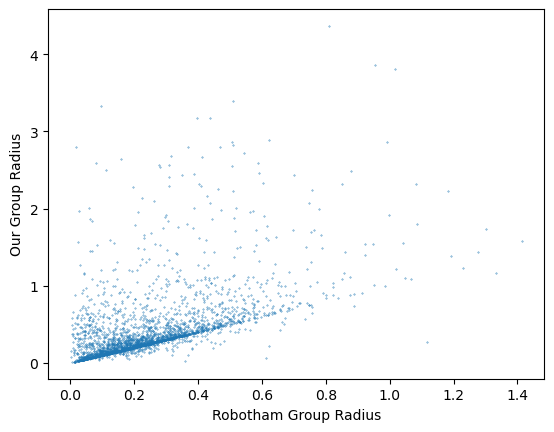

In [20]:
plt.scatter(dfRec['Rad50'], dfRec['Rad'], s=0.1)
plt.xlabel('Robotham Group Radius')
plt.ylabel('Our Group Radius')
plt.show()

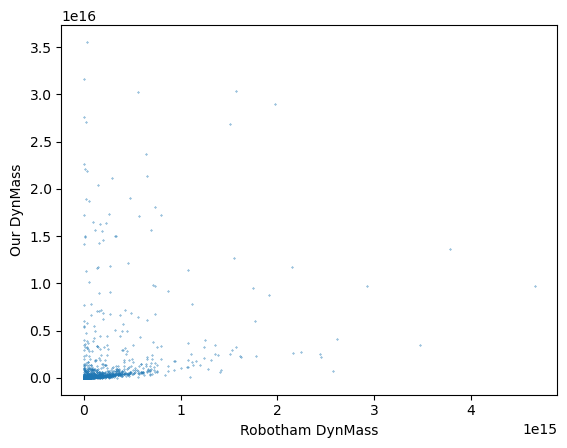

In [21]:
plt.scatter(dfRec['MassA'], dfRec['DynMass'], s=0.1)
plt.xlabel('Robotham DynMass')
plt.ylabel('Our DynMass')
plt.show()

#### Measurement comparison for groups with same central galaxy, same number of galaxies and galaxy population >= 5

In [22]:
matching_df = dfRec[dfRec[['IterCenCATAID', 'Nfof']].apply(tuple, axis=1).isin(set(zip(dfR['IterCenCATAID'], dfR['Nfof'])))]
matching_count = matching_df.shape[0]
matching_count

941

In [23]:
matching_df

,RecID,Nfof,CentreID,Z,RA,Dec,IterCenCATAID,VelDisp_raw,VelDisp_Rec,Rad,DynMass,VelDisp_R,VelDispRaw,Rad50,MassA
24,157,12,30613,0.076090,175.131918,0.853182,97907,288.846493,287.866145,0.145033,2.794338e+13,287.755737,288.736481,0.144900,2.789507e+13
35,207,5,30649,0.262464,175.286359,0.848395,97952,162.096330,158.581880,0.194101,1.134920e+13,158.580780,162.095245,0.193739,1.132739e+13
100,601,5,31025,0.141580,177.697106,0.863279,98358,106.821470,102.440243,0.145802,3.557415e+12,102.418930,106.801033,0.146183,3.565075e+12
140,834,5,847,0.268846,179.162296,0.716875,7722,348.768944,344.303626,0.087057,2.399472e+13,344.216949,348.683380,0.086687,2.387970e+13
192,1173,6,26903,0.079894,180.490638,0.613374,85019,134.549998,133.223926,0.180901,7.465097e+12,133.245407,134.571274,0.180724,7.459908e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25825,183139,6,183148,0.204314,136.300029,-1.171806,3908005,466.882625,465.306220,0.112162,5.646185e+13,466.031464,467.605438,0.112569,5.684103e+13
25829,183170,6,183171,0.174614,136.400201,-1.044504,3908190,476.842291,475.542218,0.158753,8.346995e+13,475.613159,476.913025,0.158293,8.324975e+13
25864,183423,5,183423,0.264887,137.773224,-1.152244,3910361,398.718134,396.978759,0.370229,1.356549e+14,397.260590,398.998718,0.370454,1.359246e+14
25881,183534,6,183534,0.146379,138.385037,-1.155961,3911250,154.529404,151.766960,0.051766,2.772223e+12,151.778870,154.541107,0.051901,2.779795e+12


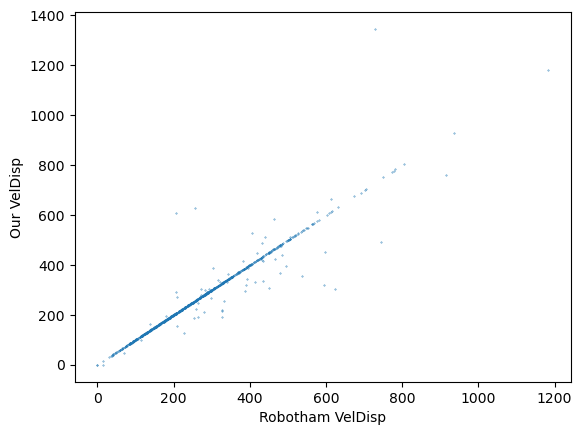

In [24]:
plt.scatter(matching_df['VelDisp_R'], matching_df['VelDisp_Rec'], s=0.1)
plt.xlabel('Robotham VelDisp')
plt.ylabel('Our VelDisp')
plt.show()

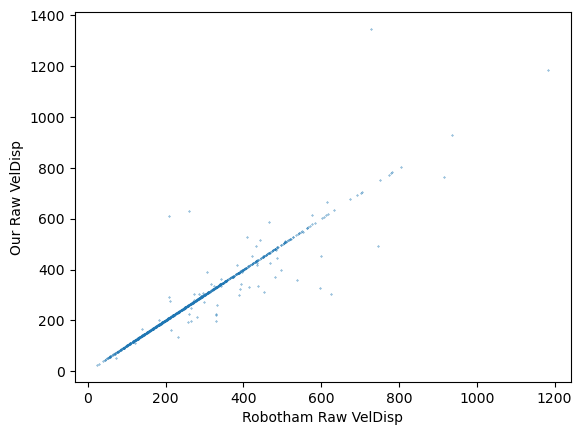

In [25]:
plt.scatter(matching_df['VelDispRaw'], matching_df['VelDisp_raw'], s=0.1)
plt.xlabel('Robotham Raw VelDisp')
plt.ylabel('Our Raw VelDisp')
plt.show()

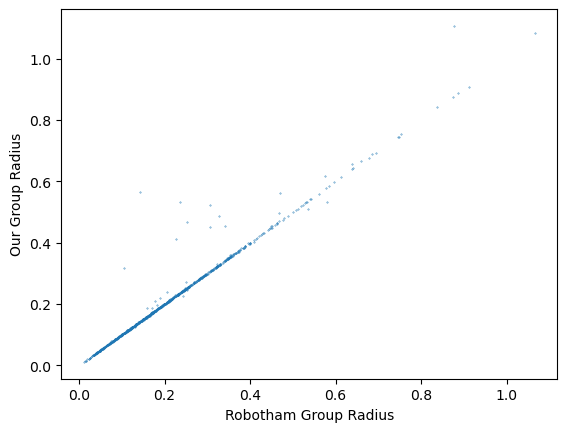

In [26]:
plt.scatter(matching_df['Rad50'], matching_df['Rad'], s=0.1)
plt.xlabel('Robotham Group Radius')
plt.ylabel('Our Group Radius')
plt.show()

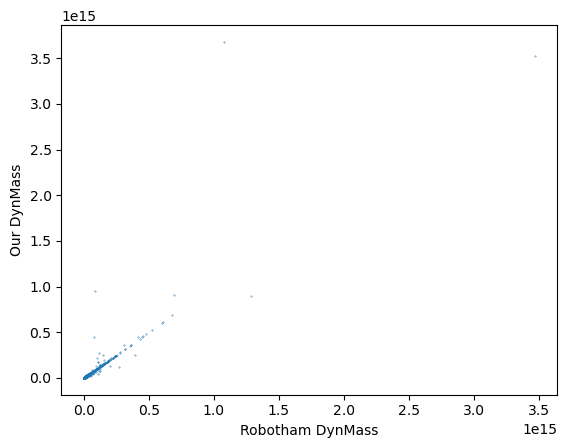

In [27]:
plt.scatter(matching_df['MassA'], matching_df['DynMass'], s=0.1)
plt.xlabel('Robotham DynMass')
plt.ylabel('Our DynMass')
plt.show()